In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from dynascale.utils.lds import plot
from dynascale.systems.lds import LDSSystem
from dynascale.baselines.dnn import DNN
from dynascale.tasks import FixedTrainSize
import numpy as np
import scipy as sp

2023-06-14 12:31:41.148220: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

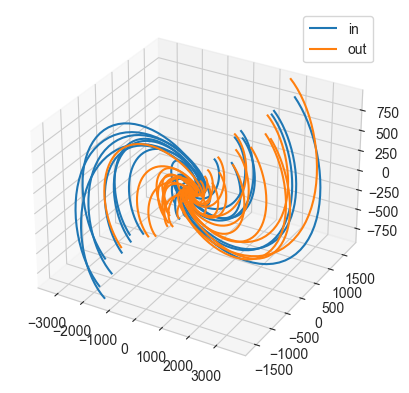

In [3]:
latent_dim = 50
embed_dim = 50
n = 5000
timesteps = 50
challenge = LDSSystem(latent_dim, embed_dim)
x0 = challenge.make_init_conds(n)
y0 = challenge.make_init_conds(30, in_dist=False)
x = challenge.make_data(x0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
y = challenge.make_data(y0, control=np.zeros((n, timesteps, embed_dim)), timesteps=timesteps)
plot([x, y], target_dim=3, labels=["in", "out"], max_lines=30)

In [ ]:
model = DNN(embed_dim, timesteps, max_control_cost=0)
model.fit(x, epochs=1000, verbose='auto')

Epoch 1/1000
157/157 [==============================] - 4s 15ms/step - loss: 13994.3477
Epoch 2/1000
157/157 [==============================] - 3s 17ms/step - loss: 1383.2275
Epoch 3/1000
157/157 [==============================] - 2s 14ms/step - loss: 1106.5624
Epoch 4/1000
157/157 [==============================] - 2s 14ms/step - loss: 866.0300
Epoch 5/1000
157/157 [==============================] - 2s 14ms/step - loss: 584.1711
Epoch 6/1000
157/157 [==============================] - 2s 12ms/step - loss: 380.3748
Epoch 7/1000
157/157 [==============================] - 2s 13ms/step - loss: 301.5691
Epoch 8/1000
157/157 [==============================] - 2s 14ms/step - loss: 264.0389
Epoch 9/1000
157/157 [==============================] - 2s 14ms/step - loss: 237.8459
Epoch 10/1000
157/157 [==============================] - 2s 13ms/step - loss: 208.8704
Epoch 11/1000
157/157 [==============================] - 3s 17ms/step - loss: 173.0066
Epoch 12/1000
157/157 [=========================

(<Figure size 640x480 with 1 Axes>, <Axes3D: >)

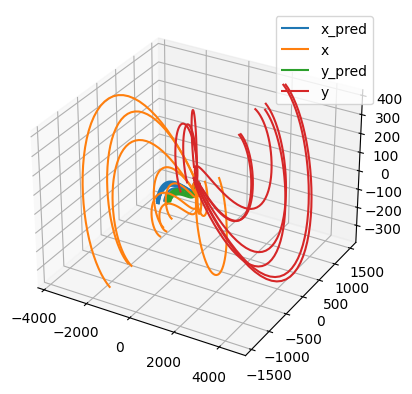

In [9]:
x_pred = model.predict(x[:, 0], 50)
y_pred = model.predict(y[:, 0], 50)
plot([x_pred, x, y_pred, y], target_dim=3, labels=["x_pred", "x", "y_pred", "y"], max_lines=10)

In [ ]:
# task = FixedTrainSize(n=5000, L=[50], T=[50], max_control_cost_per_dim=0, control_horizons=0, test_examples=10, reps=0,
#                       test_timesteps=50, challenge_cls=LDSSystem)
# data = task.evaluate(model_cls=Simple, fit_kwargs={"epochs": 5})